In [136]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [137]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep=',')
print(data.shape)
data.head(5)

(23162, 9)


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [139]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


# Busco valores duplicados

In [140]:
data[data.duplicated()]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


# Buscamos valores nulos

In [141]:
data.isnull().values.any()

False

# Revisamos qu elos datos esten completos

In [142]:
data.count()

ESTADO                23162
INGRESOS              23162
CASA                  23162
PRECIO_DISPOSITIVO    23162
MESES                 23162
DURACION              23162
SOBRECARGO            23162
SALDO_RESTANTE        23162
SATISFACCION          23162
dtype: int64

# Buscamos valores atipicos en INGRESOS

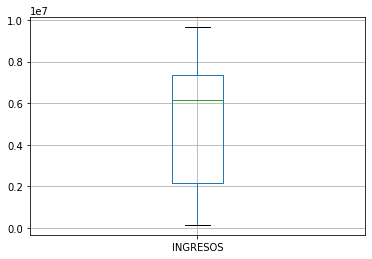

In [143]:
data.boxplot(column=['INGRESOS'])

# Buscamos valores atipicos en CASA

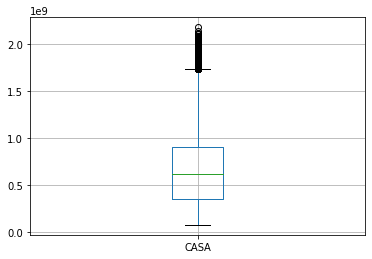

In [144]:
data.boxplot(column=['CASA'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable CASA

# Buscamos valores atipicos en PRECIO_DISPOSITIVO	

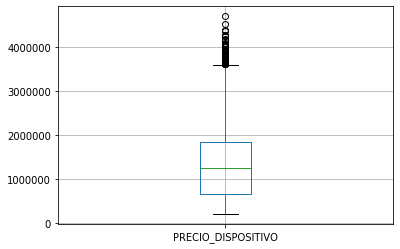

In [145]:
data.boxplot(column=['PRECIO_DISPOSITIVO'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable PRECIO_DISPOSITIVO

# Buscamos valores atipicos en MESES	

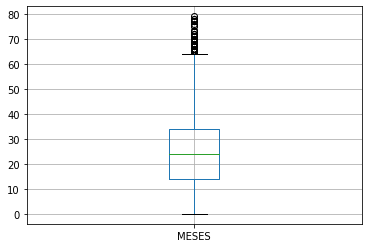

In [146]:
data.boxplot(column=['MESES'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable MESES

# Buscamos valores atipicos en DURACION

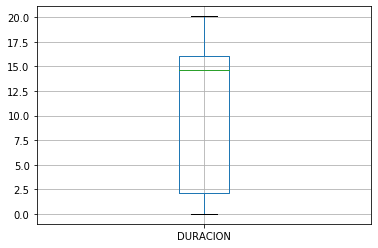

In [147]:
data.boxplot(column=['DURACION'])

# Buscamos valores atipicos en SOBRECARGO

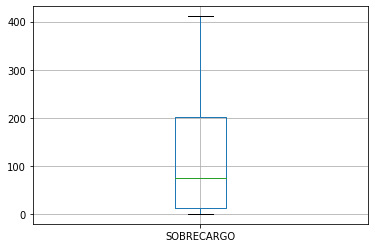

In [148]:
data.boxplot(column=['SOBRECARGO'])

# Buscamos valores atipicos en SALDO_RESTANTE

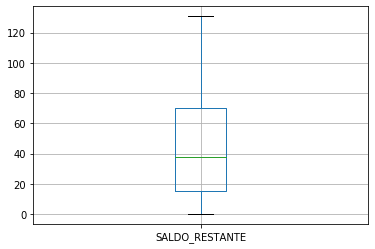

In [149]:
data.boxplot(column=['SALDO_RESTANTE'])

# Buscamos valores atipicos en SATISFACCION

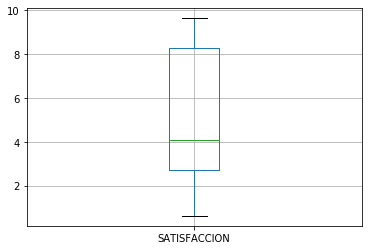

In [150]:
data.boxplot(column=['SATISFACCION'])

________________

________________

________________

# Solucion de inconsistencias en los datos


In [151]:
deletedData=data.copy()

In [152]:
print("Antes: "+str(data.shape))
def drop_numerical_outliers(data, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data.drop(data.index[~constrains], inplace=True)
drop_numerical_outliers(data)
data
print("Despues: "+str(data.shape))

Antes: (23162, 9)
Despues: (20953, 9)


In [153]:
print("Antes: "+str(deletedData.shape))
def drop_numerical_outliers1(deletedData, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = deletedData.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    deletedData.drop(deletedData.index[constrains], inplace=True)
drop_numerical_outliers1(deletedData)
deletedData
print("Despues: "+str(deletedData.shape))

Antes: (23162, 9)
Despues: (2209, 9)


# 3 Tipos de modelos

# Protocolo de evalucaion HoldOut


# Defina el protocolo de evaluación que va a utilizar para calibrar los modelos y estimar la calidad del modelo final. (0.3)

In [154]:
from sklearn import preprocessing
lista= data[["SATISFACCION","INGRESOS","MESES"]].values
lista1= data[["SATISFACCION","INGRESOS","MESES"]].values
lista2= data[["SATISFACCION","INGRESOS","MESES"]].values
X_normalized = preprocessing.normalize(lista, norm='l2')
X_normalized1 = preprocessing.normalize(lista1, norm='l2')
X_normalized2 = preprocessing.normalize(lista2, norm='l2')
y=data[["ESTADO"]]
y1=data[["ESTADO"]]
y2=data[["ESTADO"]]
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normalized1, y1, test_size=0.3,random_state=12345)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalized2, y2, test_size=0.3,random_state=12345)

# Establezca las métricas que va a utilizar, justificando su escogencia (0.2)

Para este proyecto vamos a utilizar las metricas  de <b>Kappa global</b>, <b>Accuracy</b> y la <b>Precision</b> que nos permitiran determinar el mejor modelo a seguir. En este caso el <b>Kappa global</b> determinar el mejor modelo que se encuentre por encima del baseline. El <b>Accuracy</b> nos permitira ver la cantidad de predicciones positivas que fueron correctas. Por ultimo la <b>Precision</b> nos dara una vista del porcentaje de casos positivos detectados.

# Modelo KNN

# Modelo Arbol de decision

# Naive-Bayes